In [49]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat
from numpy.random import choice
from numpy.lib import pad
from math import sqrt, floor, ceil

### 1.1 Visualizing the data

In [4]:
def load_data(file):
    return loadmat(file)

In [76]:
data = load_data('./ex4data1.mat')
X = data['X']
# y = np.array(list(map(lambda a: [0] if a[0] == 10 else a, data['y'])))
y = data['y']
print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


In [77]:
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array looks like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))


def unblockshaped(arr, h, w):
    """
    Return an array of shape (h, w) where
    h * w = arr.size

    If arr is of shape (n, nrows, ncols), n sublocks of shape (nrows, ncols),
    then the returned array preserves the "physical" layout of the sublocks.
    """
    n, nrows, ncols = arr.shape
    return (arr.reshape(h//nrows, -1, nrows, ncols)
               .swapaxes(1,2)
               .reshape(h, w))

def pad_with_ones(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 1
    vector[-pad_width[1]:] = 1
    return vector

def display_data(data):
    imgs = np.array([pad(data[i].reshape(20, 20).T, 1, pad_with_ones) for i in range(len(data))])
    
    m, height, width = imgs.shape
    n_row = floor(sqrt(m))
    n_col = ceil(m/n_row)
    
    imgs = unblockshaped(imgs, n_row*imgs.shape[1], n_col*imgs.shape[2])
    
    plt.gray()
    plt.imshow(imgs)

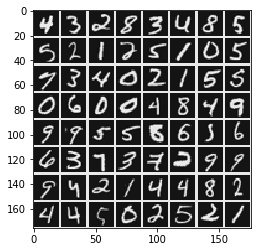

In [78]:
sample_data = X[choice(X.shape[0], 64, replace=False)]
# sample_data = X[0:64]
display_data(sample_data)

### 1.2 Model representation

In [121]:
weights = load_data('./ex4weights.mat')
theta_1 = weights['Theta1']
theta_2 = weights['Theta2']
print(theta_1.shape)
print(theta_2.shape)

(25, 401)
(10, 26)


### 1.3 Feedforward and cost function

In [116]:
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

In [117]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    pass

In [118]:
def nn_cost_function_without_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    m = len(y)
    theta_1 = nn_params[:hidden_layer_size*(input_layer_size+1)].reshape(hidden_layer_size, input_layer_size+1)
    theta_2 = nn_params[hidden_layer_size*(input_layer_size+1):].reshape(num_labels, hidden_layer_size+1)

    theta_1_grad = np.zeros((theta_1.shape[0], theta_1.shape[1]))
    theta_2_grad = np.zeros((theta_2.shape[0], theta_2.shape[1]))

    a1 = np.c_[np.ones((X.shape[0],1)), X] # 5000*401

    z2 = theta_1.dot(a1.T) # 25*5000
    a2 = np.c_[np.ones((X.shape[0],1)), sigmoid(z2.T)]
    
    z3 = theta_2.dot(a2.T)
    a3 = sigmoid(z3) # 10*5000
    hx = a3
#     hx = np.roll(a4,1,axis=1)
    y_matrix = pd.get_dummies(y.ravel()).values
    print(y.shape)
    print(y_matrix.shape)
    print(y[0])
    print(y_matrix[0])
    print(hx.shape)
    print(hx[0])
    J = (-1/m)*np.sum((y_matrix.T.dot(np.log(hx.T)) + (1-y_matrix).T.dot(np.log(1-hx.T))))
    print(J)
#     hx = sigmoid(theta.dot(X.T))
#     J = (-1/m)*(y.T.dot(np.log(hx)) + (1-y).T.dot(np.log(1-hx))) + (lamb/(2*m))*np.sum(np.power(theta[1:],2))
    
#     return J

In [119]:
nn_params = np.r_[theta_1.flatten(), theta_2.flatten()]
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
lamb = 1

In [120]:
nn_cost_function_without_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb)

(5000, 1)
(5000, 10)
[10]
[0 0 0 0 0 0 0 0 0 1]
(10, 5000)
[1.12661530e-04 4.79026796e-04 8.85702310e-05 ... 5.17641791e-02
 8.30631310e-04 4.81465717e-05]
89.36616413827161
